The input-output relationship of a Hammerstein Model is described by: $$V_t=m(U_t),\quad W_t=\sum_{i=0}^p \lambda_i V_t,\quad Y_t = V_t + Z_t,$$


![jupyter](./img/Hammerstein.png)

Only (U_t, Y_t) are obsered. V_t and W_t are intermediate signals, and Z_t is a noise process. 

In [81]:
import numpy as np
from matplotlib import pyplot as plt
def Hammerstein(n,input_std, nonlinear_fun, linear_fun, noise_std):
    n1 = n+len(linear_fun)
    U = np.random.normal(loc=0,scale=input_std,size=(n1,1))
    V = nonlinear_fun(U)
    V1 = V
    W = np.zeros([n1,1])
    for i in range(len(linear_fun)):
        W = V1[:n1]*linear_fun[i]+W
        V1 = np.insert(V1,0,0,axis=0)
    Z = np.random.normal(loc=0,scale=noise_std,size=(n1,1))
    Y = W+Z
    U = U[len(linear_fun):]
    Y = Y[len(linear_fun):]
    return U,Y


In [ ]:
n=100
input_std=1
noise_std=0.1
nonlinear_fun = lambda x: x**3
linear_fun = [1,-0.8,0.6,-0.4]
U,Y = Hammerstein(n,input_std, nonlinear_fun, linear_fun, noise_std)

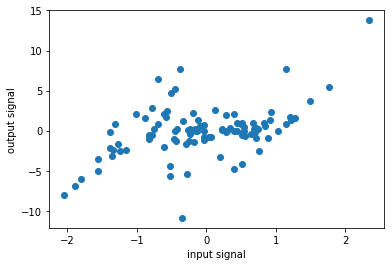

In [87]:
plt.scatter(U,Y)
plt.xlabel('input signal')
plt.ylabel('output signal')
plt.show()